## **Skin Lesion Classification**

**Semester Project of Machine Learning and Deep Learning**

* *Muhammad Zain Amin, Md. Imran Hossain, Taiabur Rahman*

* *Erasmus Mundus Joint Master Degree in Medical Imaging and Applications*

* *University of Cassino and Southern Lazio (UNICAS), Italy*


*1.* **Import Libraries** 

In [ ]:
# Import Libraries
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from glob import glob

*2.* **Import Dataset** 

We are going to use the original ISIC2017 dataset. The ISIC2017 dataset contains

*   Training set: 2000 images
*   Validation set: 150 images
*   Test set: 600 images

*   Mount Drive



In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

*   Specifying the training, validation and test datasets folder paths from the Google Drive

In [ ]:
# Specify the training, validation and test datasets folder paths
training_data_path          = '/content/drive/MyDrive/Colab Notebooks/Machine and Deep Learning /Skin Lesion Classification Project/Skin-Lesion-Dataset/ISIC-2017_Training_Data'
training_data_groudtruth    = '/content/drive/MyDrive/Colab Notebooks/Machine and Deep Learning /Skin Lesion Classification Project/Skin-Lesion-Dataset/ISIC-2017_Training_GroundTruth.csv'

validation_data_path        = '/content/drive/MyDrive/Colab Notebooks/Machine and Deep Learning /Skin Lesion Classification Project/Skin-Lesion-Dataset/ISIC-2017_Validation_Data'
validation_data_groudtruth  = '/content/drive/MyDrive/Colab Notebooks/Machine and Deep Learning /Skin Lesion Classification Project/Skin-Lesion-Dataset/ISIC-2017_Validation_GroundTruth.csv'

test_data_path              = '/content/drive/MyDrive/Colab Notebooks/Machine and Deep Learning /Skin Lesion Classification Project/Skin-Lesion-Dataset/ISIC-2017_Test_Data'
test_data_groudtruth        = '/content/drive/MyDrive/Colab Notebooks/Machine and Deep Learning /Skin Lesion Classification Project/Skin-Lesion-Dataset/ISIC-2017_Test_GroundTruth.csv'

*   Loading the lists of all the training, validation and test image files present in their relevent data path 

In [ ]:
# Get a list of all the .jpg image files in the training data path
training_data_files  = os.path.join(training_data_path, '*.jpg')
training_image_files = glob(training_data_files)

# Get a list of all the .jpg image files in the validation data path
validation_data_files  = os.path.join(validation_data_path, '*.jpg')
validation_image_files = glob(validation_data_files)

# Get a list of all the .jpg image files in the validation data path
test_data_files  = os.path.join(test_data_path, '*.jpg')
test_image_files = glob(test_data_files)

*   Mapping of all the training, validation and test image IDs to their path



In [ ]:
# Mapping of training images IDs to their paths
training_images_mapping   = {os.path.splitext(os.path.basename(path))[0]: path for path in training_image_files}

# Mapping of validation images IDs to their paths
validation_images_mapping = {os.path.splitext(os.path.basename(path))[0]: path for path in validation_image_files}

# Mapping of test images IDs to their paths
test_images_mapping       = {os.path.splitext(os.path.basename(path))[0]: path for path in test_image_files}

*   Display of few image samples from the training dataset along with their dimensions

In [ ]:
# Display the Training Image Files
for index, image_file in enumerate(training_image_files):
    if index >= 5:
        break
    image_path = os.path.join(training_data_path, image_file)
    image = Image.open(image_path)
    image_dimensions = image.size
    
    # Display the images
    plt.imshow(image)
    plt.axis('off')  # Optional: Remove axis
    
    # Display the dimensions
    plt.title(f"Dimensions: {image_dimensions[0]} x {image_dimensions[1]}")
    plt.show()

*   Display of few image samples from the validation dataset along with their dimensions



In [ ]:
# Display the Validation Image Files
for index, image_file in enumerate(validation_image_files):
    if index >= 5:
        break
    image_path = os.path.join(validation_data_path, image_file)
    image = Image.open(image_path)
    image_dimensions = image.size
    
    # Display the images
    plt.imshow(image)
    plt.axis('off')  # Optional: Remove axis
    
    # Display the dimensions
    plt.title(f"Dimensions: {image_dimensions[0]} x {image_dimensions[1]}")
    plt.show()

*   Display of few image samples from the test dataset along with their dimensions

In [ ]:
# Display the Test Image Files
for index, image_file in enumerate(test_image_files):
    if index >= 5:
        break
    image_path = os.path.join(test_data_path, image_file)
    image = Image.open(image_path)
    image_dimensions = image.size
    
    # Display the images
    plt.imshow(image)
    plt.axis('off')  # Optional: Remove axis
    
    # Display the dimensions
    plt.title(f"Dimensions: {image_dimensions[0]} x {image_dimensions[1]}")
    plt.show()

*   Display of the training, validation, and test data groundtruth files

*3.* **Feature Engineering** 

*3.1*.  **Hierarchical Binary Classification between Benign Class vs. Others Class**

In [ ]:
# Display the training data groundtruth file
train_groundtruth_bo = pd.read_csv(training_data_groudtruth)
print('Training Data Groudtruth File:')
print(train_groundtruth_bo.head())

# Display the validation data groundtruth file
validation_groundtruth_bo = pd.read_csv(validation_data_groudtruth)
print('Validation Data Groudtruth File:')
print(validation_groundtruth_bo.head())

# Display the test data groundtruth file
test_groundtruth_bo = pd.read_csv(test_data_groudtruth)
print('Test Data Groudtruth File:')
print(test_groundtruth_bo.head())

Firstly, we are going to build new columns for the benign class and the others class to make it easier for us to do the classification stuff, because there are no columns of the benign class and the others class in the training groundtruth file. 

*   **Benign Class:** Benign case is present when the other two cases i.e. melanoma and seborrheic_keratosis cases are absent. 
*   **Others Class:** If one of the two cases i.e. either melanoma or seborrheic_keratosis cases is present, then it is considered as an other class sample.

In [ ]:
# Checking the number of melanoma cases in the training data
train_melanoma_cases = train_groundtruth_bo['melanoma'].value_counts()
# Display the number of melanoma cases
print("Total number of melanoma cases in the training dataset:", train_melanoma_cases[1])

# Checking the number of seborrheic_keratosis cases in the training data
train_seborrheic_keratosis_cases = train_groundtruth_bo['seborrheic_keratosis'].value_counts()
# Display the number of seborrheic_keratosis cases
print("Total number of seborrheic_keratosis cases in the training dataset:", train_seborrheic_keratosis_cases[1])

# Here I am creating a new column for the benign class in the training data, because there is no benign class column in the train groundtruth 
train_groundtruth_bo['benign'] = ((train_groundtruth_bo['melanoma'] == 0) & (train_groundtruth_bo['seborrheic_keratosis'] == 0)).astype(int)
# Checking the number of benign cases in the training data
train_benign_cases = train_groundtruth_bo['benign'].value_counts()
# Display the number of benign cases
print("Total number of benign cases in the training dataset:", train_benign_cases[1])

# Here I am creating a new column for the others class in the training data, because there is no other class column in the train groundtruth 
train_groundtruth_bo['others'] = 0
train_groundtruth_bo.loc[(train_groundtruth_bo['melanoma'] == 1) | (train_groundtruth_bo['seborrheic_keratosis'] == 1), 'others'] = 1
# Checking the number of other cases in the training data
train_other_cases = train_groundtruth_bo['others'].value_counts()
# Display the number of other cases
print("Total number of other cases in the training dataset:", train_other_cases[1])

# So, here is the updated training groundtruth file
print(train_groundtruth_bo.head())

If you now look at the number of other cases i.e. melanoma, and seborrheic_keratosis cases in the training dataset, you can clearly see that the training dataset is highly unbalanced. The number of benign cases are very high as compared to the number of other cases. To overcome this issue, now we are going to downsample the benign cases and upsample the others cases i.e. "melanoma, and seborrheic_keratosis cases".

In [ ]:
# Let's downsample the Benign cases in the training dataset
benign_cases = train_groundtruth_bo[train_groundtruth_bo['benign'] == 1]
downsampled_benign_cases = benign_cases.sample(n=1000, replace=False, random_state=42)
print('The number of samples in the benign cases after the downsampling: ',len(downsampled_benign_cases))

*   So, we have downsampled the benign cases in the training dataset to 1000 cases from 1372 cases using the sample function from the numpy library.
*   The downsampled_benign_cases DataFrame now contains 1000 randomly selected Benign cases.

In [ ]:
# Let's upsample the Others cases in the training dataset
others_cases = train_groundtruth_bo[train_groundtruth_bo['others'] == 1]
upsampled_others_cases = others_cases.sample(n=1000, replace=True, random_state=42)
print('The number of samples in the others cases after the upsampling: ',len(upsampled_others_cases))

*   So, we have upsampled the other cases in the training dataset to 1000 cases from 628 cases using the sample function from the numpy library.
*   The upsampled_others_cases DataFrame now contains 1000 randomly selected Others cases.

In [ ]:
# Let's concatenate the downsampled_benign_cases and upsampled_others_cases together using the pandas library "concat" function
train_balanced_cases = pd.concat([downsampled_benign_cases, upsampled_others_cases])
train_balanced_cases = train_balanced_cases.sample(frac=1, random_state=42)
print('The total number of cases after downsamling and upsampling:',len(train_balanced_cases))

Now, we are going to read the training image files and also add them into the dataframe for classification purposes. After adding the training images into the dataframe, we have done these follwoing two steps.

*   Normalization of the training images.
*   Assigning the label values to each class, 1 represents the benign class sample, and 0 represents the others class sample. 

In [14]:
# Let's read the training images and also add them in the dataframe
train_balanced_cases['image_path'] = train_balanced_cases['image_id'].map(training_images_mapping)
train_balanced_cases['images'] = train_balanced_cases['image_path'].map(lambda x: np.asarray(Image.open(x).resize((128, 128))))

# Normalize of training images
train_images_bo = np.asarray(train_balanced_cases['images'].tolist())
train_images_bo = train_images_bo/255.

# Labels of training images
train_label_bo = train_balanced_cases['benign']
train_benign_dataset = train_images_bo[train_label_bo == 1]
train_others_dataset = train_images_bo[train_label_bo == 0]

*   So, now we have the balanced training dataset with an equal number of Benign and Others cases.

Here, we are again going to build new columns for the benign class and the others class to make it easier for us to do the classification stuff, because also there are no columns of the benign class and the others class in the validation groundtruth file. 

*   **Benign Class:** Benign case is present when the other two cases i.e. melanoma and seborrheic_keratosis cases are absent. 
*   **Others Class:** If one of the two cases i.e. either melanoma or seborrheic_keratosis cases is present, then it is considered as an other class sample.

In [15]:
# Checking the number of melanoma cases in the validation data
validation_melanoma_cases = validation_groundtruth_bo['melanoma'].value_counts()
# Display the number of melanoma cases
print("Total number of melanoma cases in the validation dataset:", validation_melanoma_cases[1])

# Checking the number of seborrheic_keratosis cases in the validation data
validation_seborrheic_keratosis_cases = validation_groundtruth_bo['seborrheic_keratosis'].value_counts()
# Display the number of seborrheic_keratosis cases
print("Total number of seborrheic_keratosis cases in the validation dataset:", validation_seborrheic_keratosis_cases[1])

# Here I am creating a new column for the benign class in the validation data, because there is no benign class column in the validation groundtruth 
validation_groundtruth_bo['benign'] = ((validation_groundtruth_bo['melanoma'] == 0) & (validation_groundtruth_bo['seborrheic_keratosis'] == 0)).astype(int)
# Checking the number of benign cases in the validation data
validation_benign_cases = validation_groundtruth_bo['benign'].value_counts()
# Display the number of benign cases
print("Total number of benign cases in the validation dataset:", validation_benign_cases[1])

# Here I am creating a new column for the others class in the validation data, because there is no other class column in the validation groundtruth 
validation_groundtruth_bo['others'] = 0
validation_groundtruth_bo.loc[(validation_groundtruth_bo['melanoma'] == 1) | (validation_groundtruth_bo['seborrheic_keratosis'] == 1), 'others'] = 1
# Checking the number of other cases in the validation data
validation_other_cases = validation_groundtruth_bo['others'].value_counts()
# Display the number of other cases
print("Total number of other cases in the validation dataset:", validation_other_cases[1])

# So, here is the updated validation groundtruth file
print(validation_groundtruth_bo.head())

Total number of melanoma cases in the validation dataset: 30
Total number of seborrheic_keratosis cases in the validation dataset: 42
Total number of benign cases in the validation dataset: 78
Total number of other cases in the validation dataset: 72
       image_id  melanoma  seborrheic_keratosis  benign  others
0  ISIC_0001769       0.0                   0.0       1       0
1  ISIC_0001852       0.0                   0.0       1       0
2  ISIC_0001871       0.0                   0.0       1       0
3  ISIC_0003462       0.0                   0.0       1       0
4  ISIC_0003539       0.0                   0.0       1       0


Also, we are going to read the validation image files and adding them into the dataframe for classification purposes. After adding the validation images into the dataframe, we have done these follwoing two steps.

*   Normalization of the validation images.
*   Assigning the label values to each class, 1 represents the benign class sample, and 0 represents the others class sample. 

In [16]:
# Let's read the validation images and also add them in the dataframe
validation_groundtruth_bo['image_path'] = validation_groundtruth_bo['image_id'].map(validation_images_mapping)
validation_groundtruth_bo['images'] = validation_groundtruth_bo['image_path'].map(lambda x: np.asarray(Image.open(x).resize((128, 128))))

# Normalize of validation images
validation_images_bo = np.asarray(validation_groundtruth_bo['images'].tolist())
validation_images_bo = validation_images_bo/255.

# Labels of validation images
validation_label_bo = validation_groundtruth_bo['benign']
validation_benign_dataset = validation_images_bo[validation_label_bo == 1]
validation_others_dataset = validation_images_bo[validation_label_bo == 0]

Here, we are again going to build new columns for the benign class and the others class to make it easier for us to do the classification stuff, because also there are no columns of the benign class and the others class in the test groundtruth file. 

*   **Benign Class:** Benign case is present when the other two cases i.e. melanoma and seborrheic_keratosis cases are absent. 
*   **Others Class:** If one of the two cases i.e. either melanoma or seborrheic_keratosis cases is present, then it is considered as an other class sample.

In [17]:
# Checking the number of melanoma cases in the test data
test_melanoma_cases = test_groundtruth_bo['melanoma'].value_counts()
# Display the number of melanoma cases
print("Total number of melanoma cases in the test dataset:", test_melanoma_cases[1])

# Checking the number of seborrheic_keratosis cases in the test data
test_seborrheic_keratosis_cases = test_groundtruth_bo['seborrheic_keratosis'].value_counts()
# Display the number of seborrheic_keratosis cases
print("Total number of seborrheic_keratosis cases in the test dataset:", test_seborrheic_keratosis_cases[1])

# Here I am creating a new column for the benign class in the test data, because there is no benign class column in the test groundtruth 
test_groundtruth_bo['benign'] = ((test_groundtruth_bo['melanoma'] == 0) & (test_groundtruth_bo['seborrheic_keratosis'] == 0)).astype(int)
# Checking the number of benign cases in the test data
test_benign_cases = test_groundtruth_bo['benign'].value_counts()
# Display the number of benign cases
print("Total number of benign cases in the test dataset:", test_benign_cases[1])

# Here I am creating a new column for the others class in the test data, because there is no other class column in the test groundtruth 
test_groundtruth_bo['others'] = 0
test_groundtruth_bo.loc[(test_groundtruth_bo['melanoma'] == 1) | (test_groundtruth_bo['seborrheic_keratosis'] == 1), 'others'] = 1
# Checking the number of other cases in the test data
test_other_cases = test_groundtruth_bo['others'].value_counts()
# Display the number of other cases
print("Total number of other cases in the test dataset:", test_other_cases[1])

# So, here is the updated test groundtruth file
print(test_groundtruth_bo.head())

Total number of melanoma cases in the test dataset: 117
Total number of seborrheic_keratosis cases in the test dataset: 90
Total number of benign cases in the test dataset: 393
Total number of other cases in the test dataset: 207
       image_id  melanoma  seborrheic_keratosis  benign  others
0  ISIC_0012086       0.0                   1.0       0       1
1  ISIC_0012092       0.0                   0.0       1       0
2  ISIC_0012095       0.0                   0.0       1       0
3  ISIC_0012134       0.0                   1.0       0       1
4  ISIC_0012136       0.0                   1.0       0       1


Also, we are going to read the test image files and adding them into the dataframe for classification purposes. After adding the test images into the dataframe, we have done these follwoing two steps.

*   Normalization of the test images.
*   Assigning the label values to each class, 1 represents the benign class sample, and 0 represents the others class sample. 

In [18]:
# Let's read the test images and also add them in the dataframe
test_groundtruth_bo['image_path'] = test_groundtruth_bo['image_id'].map(test_images_mapping)
test_groundtruth_bo['images'] = test_groundtruth_bo['image_path'].map(lambda x: np.asarray(Image.open(x).resize((128, 128))))

# Normalize of test images
test_images_bo = np.asarray(test_groundtruth_bo['images'].tolist())
test_images_bo = test_images_bo/255.

# Labels of test images
test_label_bo = test_groundtruth_bo['benign']
test_benign_dataset = test_images_bo[test_label_bo == 1]
test_others_dataset = test_images_bo[test_label_bo == 0]

So, here after implemented all the required feature engineering steps, we have the final training, validation and test sets for the classification purpose of benign vs. others class.

In [19]:
# Training sets 
X_train_bo = np.concatenate([train_benign_dataset, train_others_dataset])
Y_train_bo = np.concatenate([np.ones(len(train_benign_dataset)), np.zeros(len(train_others_dataset))])

# Validation sets
X_validation_bo = np.concatenate([validation_benign_dataset, validation_others_dataset])
Y_validation_bo = np.concatenate([np.ones(len(validation_benign_dataset)), np.zeros(len(validation_others_dataset))])

# Test sets
X_test_bo = np.concatenate([test_benign_dataset, test_others_dataset])
Y_test_bo = np.concatenate([np.ones(len(test_benign_dataset)), np.zeros(len(test_others_dataset))])

*3.2*.  **Hierarchical Binary Classification between Melanoma Class vs. Seborreic Class**

In [20]:
# Display the training data groundtruth file
train_groundtruth_ms = pd.read_csv(training_data_groudtruth)
print('Training Data Groudtruth File:')
print(train_groundtruth_ms.head())

# Display the validation data groundtruth file
validation_groundtruth_ms = pd.read_csv(validation_data_groudtruth)
print('Validation Data Groudtruth File:')
print(validation_groundtruth_ms.head())

# Display the test data groundtruth file
test_groundtruth_ms = pd.read_csv(test_data_groudtruth)
print('Test Data Groudtruth File:')
print(test_groundtruth_ms.head())

Training Data Groudtruth File:
       image_id  melanoma  seborrheic_keratosis
0  ISIC_0000000       0.0                   0.0
1  ISIC_0000001       0.0                   0.0
2  ISIC_0000002       1.0                   0.0
3  ISIC_0000003       0.0                   0.0
4  ISIC_0000004       1.0                   0.0
Validation Data Groudtruth File:
       image_id  melanoma  seborrheic_keratosis
0  ISIC_0001769       0.0                   0.0
1  ISIC_0001852       0.0                   0.0
2  ISIC_0001871       0.0                   0.0
3  ISIC_0003462       0.0                   0.0
4  ISIC_0003539       0.0                   0.0
Test Data Groudtruth File:
       image_id  melanoma  seborrheic_keratosis
0  ISIC_0012086       0.0                   1.0
1  ISIC_0012092       0.0                   0.0
2  ISIC_0012095       0.0                   0.0
3  ISIC_0012134       0.0                   1.0
4  ISIC_0012136       0.0                   1.0


*   Here we are going to filter the training dataset to remove cases with neither melanoma nor seborrheic keratosis.




In [21]:
# Checking the number of melanoma cases in the training data
train_melanoma_cases = train_groundtruth_ms['melanoma'].value_counts()
# Display the number of melanoma cases
print("Total number of melanoma cases in the training dataset:", train_melanoma_cases[1])

# Checking the number of seborrheic_keratosis cases in the training data
train_seborrheic_keratosis_cases = train_groundtruth_ms['seborrheic_keratosis'].value_counts()
# Display the number of seborrheic_keratosis cases
print("Total number of seborrheic_keratosis cases in the training dataset:", train_seborrheic_keratosis_cases[1])

# Filter the training dataset to remove cases with neither melanoma nor seborrheic keratosis
updated_train_groundtruth_ms = train_groundtruth_ms[(train_groundtruth_ms['melanoma'] != 0.0) | (train_groundtruth_ms['seborrheic_keratosis'] != 0.0)]

# Number of cases in the original training dataset
original_train_dataset_cases = len(train_groundtruth_ms)
# Number of cases in the updated training dataset
updated_train_dataset_cases = len(updated_train_groundtruth_ms)
# Number of removed cases in the training dataset
train_removed_cases = original_train_dataset_cases - updated_train_dataset_cases
# Display the number of removed cases from the training dataset
print("Number of removed cases from the training dataset:", train_removed_cases)

Total number of melanoma cases in the training dataset: 374
Total number of seborrheic_keratosis cases in the training dataset: 254
Number of removed cases from the training dataset: 1372


Now, we are going to read the training image files and adding them into the dataframe for classification purposes. After adding the training images into the dataframe, we have done these follwoing two steps.

*   Normalization of the training images.
*   Assigning the label values to each class, 1 represents the melanoma class, and 0 represents the seborrheic_keratosis class sample. 

In [22]:
# Let's read the training images and also add them in the dataframe
updated_train_groundtruth_ms = updated_train_groundtruth_ms.copy()
updated_train_groundtruth_ms['image_path'] = updated_train_groundtruth_ms['image_id'].map(training_images_mapping)
updated_train_groundtruth_ms['images'] = updated_train_groundtruth_ms['image_path'].map(lambda x: np.asarray(Image.open(x).resize((128, 128))))

# Normalize of training images
training_images_ms = np.asarray(updated_train_groundtruth_ms['images'].tolist())
training_images_ms = training_images_ms/255.

# Labels of training images
training_label_ms = updated_train_groundtruth_ms['melanoma']
training_melanoma_dataset = training_images_ms[training_label_ms == 1]
training_seborrheic_keratosis_dataset = training_images_ms[training_label_ms == 0]

*   Here we are going to filter the validation dataset to remove cases with neither melanoma nor seborrheic keratosis.

In [23]:
# Checking the number of melanoma cases in the validation data
validation_melanoma_cases = validation_groundtruth_ms['melanoma'].value_counts()
# Display the number of melanoma cases
print("Total number of melanoma cases in the validation dataset:", validation_melanoma_cases[1])

# Checking the number of seborrheic_keratosis cases in the validation data
validation_seborrheic_keratosis_cases = validation_groundtruth_ms['seborrheic_keratosis'].value_counts()
# Display the number of seborrheic_keratosis cases
print("Total number of seborrheic_keratosis cases in the validation dataset:", validation_seborrheic_keratosis_cases[1])

# Filter the validation dataset to remove cases with neither melanoma nor seborrheic keratosis
updated_validation_groundtruth_ms = validation_groundtruth_ms[(validation_groundtruth_ms['melanoma'] != 0.0) | (validation_groundtruth_ms['seborrheic_keratosis'] != 0.0)]

# Number of cases in the original validation dataset
original_validation_dataset_cases = len(validation_groundtruth_ms)
# Number of cases in the updated validation dataset
updated_validation_dataset_cases = len(updated_validation_groundtruth_ms)
# Number of removed cases in the validation dataset
validation_removed_cases = original_validation_dataset_cases - updated_validation_dataset_cases
# Display the number of removed cases from the validation dataset
print("Number of removed cases from the validation dataset:", validation_removed_cases)

Total number of melanoma cases in the validation dataset: 30
Total number of seborrheic_keratosis cases in the validation dataset: 42
Number of removed cases from the validation dataset: 78


Now, we are going to read the validation image files and adding them into the dataframe for classification purposes. After adding the validation images into the dataframe, we have done these follwoing two steps.

*   Normalization of the validation images.
*   Assigning the label values to each class, 1 represents the melanoma class, and 0 represents the seborrheic_keratosis class sample. 

In [24]:
# Let's read the validation images and also add them in the dataframe
updated_validation_groundtruth_ms = updated_validation_groundtruth_ms.copy()
updated_validation_groundtruth_ms['image_path'] = updated_validation_groundtruth_ms['image_id'].map(validation_images_mapping)
updated_validation_groundtruth_ms['images'] = updated_validation_groundtruth_ms['image_path'].map(lambda x: np.asarray(Image.open(x).resize((128, 128))))

# Normalize of validation images
validation_images_ms = np.asarray(updated_validation_groundtruth_ms['images'].tolist())
validation_images_ms = validation_images_ms/255.

# Labels of validation images
validation_label_ms = updated_validation_groundtruth_ms['melanoma']
validation_melanoma_dataset = validation_images_ms[validation_label_ms == 1]
validation_seborrheic_keratosis_dataset = validation_images_ms[validation_label_ms == 0]

*   Here we are going to filter the test dataset to remove cases with neither melanoma nor seborrheic keratosis.

In [25]:
# Checking the number of melanoma cases in the test data
test_melanoma_cases = test_groundtruth_ms['melanoma'].value_counts()
# Display the number of melanoma cases
print("Total number of melanoma cases in the test dataset:", test_melanoma_cases[1])

# Checking the number of seborrheic_keratosis cases in the test data
test_seborrheic_keratosis_cases = test_groundtruth_ms['seborrheic_keratosis'].value_counts()
# Display the number of seborrheic_keratosis cases
print("Total number of seborrheic_keratosis cases in the test dataset:", test_seborrheic_keratosis_cases[1])

# Filter the test dataset to remove cases with neither melanoma nor seborrheic keratosis
updated_test_groundtruth_ms = test_groundtruth_ms[(test_groundtruth_ms['melanoma'] != 0.0) | (test_groundtruth_ms['seborrheic_keratosis'] != 0.0)]

# Number of cases in the original test dataset
original_test_dataset_cases = len(test_groundtruth_ms)
# Number of cases in the updated test dataset
updated_test_dataset_cases = len(updated_test_groundtruth_ms)
# Number of removed cases in the test dataset
test_removed_cases = original_test_dataset_cases - updated_test_dataset_cases
# Display the number of removed cases from the test dataset
print("Number of removed cases from the test dataset:", test_removed_cases)

Total number of melanoma cases in the test dataset: 117
Total number of seborrheic_keratosis cases in the test dataset: 90
Number of removed cases from the test dataset: 393


Now, we are going to read the test image files and adding them into the dataframe for classification purposes. After adding the test images into the dataframe, we have done these follwoing two steps.

*   Normalization of the test images.
*   Assigning the label values to each class, 1 represents the melanoma class, and 0 represents the seborrheic_keratosis class sample. 

In [26]:
# Let's read the test images and also add them in the dataframe
updated_test_groundtruth_ms = updated_test_groundtruth_ms.copy()
updated_test_groundtruth_ms['image_path'] = updated_test_groundtruth_ms['image_id'].map(test_images_mapping)
updated_test_groundtruth_ms['images'] = updated_test_groundtruth_ms['image_path'].map(lambda x: np.asarray(Image.open(x).resize((128, 128))))

# Normalize of test images
test_images_ms = np.asarray(updated_test_groundtruth_ms['images'].tolist())
test_images_ms = test_images_ms/255.

# Labels of test images
test_label_ms = updated_test_groundtruth_ms['melanoma']
test_melanoma_dataset = test_images_ms[test_label_ms == 1]
test_seborrheic_keratosis_dataset = test_images_ms[test_label_ms == 0]

So, here after implemented all the required feature engineering steps, we have the final training, validation and test sets for the classification purpose between melanoma vs. seborrheic classes.

In [27]:
# Training sets 
X_train_ms = np.concatenate([training_melanoma_dataset, training_seborrheic_keratosis_dataset])
Y_train_ms = np.concatenate([np.ones(len(training_melanoma_dataset)), np.zeros(len(training_seborrheic_keratosis_dataset))])

# Validation sets
X_validation_ms = np.concatenate([validation_melanoma_dataset, validation_seborrheic_keratosis_dataset])
Y_validation_ms = np.concatenate([np.ones(len(validation_melanoma_dataset)), np.zeros(len(validation_seborrheic_keratosis_dataset))])

# Test sets
X_test_ms = np.concatenate([test_melanoma_dataset, test_seborrheic_keratosis_dataset])
Y_test_ms = np.concatenate([np.ones(len(test_melanoma_dataset)), np.zeros(len(test_seborrheic_keratosis_dataset))])

*4.* **Model Training and Classification**

*   For the model training and classification purpose, we are going to use the keras library.




In [28]:
# Import keras library and related functions such as models, layers and VGG16 pretrained keras function
import keras
from keras.applications import InceptionResNetV2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

*   we import the InceptionResNetV2 model from keras.applications and load the pre-trained weights using the 'imagenet' parameter. We set include_top=False to exclude the final fully connected layers of InceptionResNetV2, as we will be adding our own layers for classification. The input shape is set to (128, 128, 3) to match our classification requirements.



In [29]:
# Load the pre-trained InceptionResNetV2 model
InceptionResNetV2_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# We freeze the weights of the InceptionResNetV2 layers by setting layer.trainable = False
for layer in InceptionResNetV2_model.layers:
    layer.trainable = False

# Built a new Sequential model and add the pre-trained InceptionResNetV2 model as the first layer using model.add(vgg16_model) 
# This adds the VGG16 layers to our model
model = Sequential()
model.add(InceptionResNetV2_model)

# After the DenseNet201 layers, we add a flatten layer to convert the output into a 1-dimensional tensor
model.add(Flatten())
model.add(Dense(32))
model.add(Dense(1, activation='sigmoid')) # Sigmoid activation function

# Print the model summary
model.summary()

219055592/219055592 [==============================] - 7s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 2, 2, 1536)       54336736  
 onal)                                                           
                                                                 
 flatten (Flatten)           (None, 6144)              0         
                                                                 
 dense (Dense)               (None, 32)                196640    
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 54,533,409
Trainable params: 196,673
Non-trainable params: 54,336,736
_________________________________________________________________


Let's compile our model with the binary_crossentropy loss function, and adam optimizer.

In [76]:
from keras.optimizers import SGD

optimizer = SGD(learning_rate=0.005)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['acc'])

The model training is done using the fit function in Keras. These are the parameter given below:

* X_train and Y_train: These are the input features and corresponding labels of the training data, respectively. X_train represents the input images, and Y_train represents their corresponding class labels.

* epochs: It specifies the number of times the entire training dataset will be passed through the model during training. In this case, it is set to 20, meaning the model will go through the entire training dataset 20 times.

* batch_size: It determines the number of samples that will be used in each training iteration. The training data is divided into batches, and the model's weights are updated after each batch. The batch size is set to 32, which means that the model will update its weights after processing 32 samples.

* validation_data: It is used to evaluate the model's performance on a separate validation dataset during training. X_validation and Y_validation represent the input features and labels of the validation dataset, respectively. The model's performance on the validation data is computed after each epoch.

The fit function trains the model by iteratively optimizing the model's weights using the specified training data. It returns a history object that contains the training and validation loss and accuracy values for each epoch.

*4.1.* **Model Training for the  Benign vs Others class**

In [77]:
# Training the model using the fit function in Keras
InceptionResNetV2_bo = model.fit(X_train_bo, Y_train_bo, epochs= 10, batch_size = 16, validation_data=(X_validation_bo, Y_validation_bo), verbose=2)

Epoch 1/10
125/125 - 130s - loss: 0.3908 - acc: 0.9085 - val_loss: 1.6312 - val_acc: 0.6867 - 130s/epoch - 1s/step
Epoch 2/10
125/125 - 113s - loss: 0.1594 - acc: 0.9505 - val_loss: 1.9874 - val_acc: 0.6867 - 113s/epoch - 901ms/step
Epoch 3/10
125/125 - 115s - loss: 0.1218 - acc: 0.9630 - val_loss: 2.0336 - val_acc: 0.6800 - 115s/epoch - 921ms/step
Epoch 4/10
125/125 - 114s - loss: 0.1276 - acc: 0.9640 - val_loss: 2.4085 - val_acc: 0.7000 - 114s/epoch - 913ms/step
Epoch 5/10
125/125 - 114s - loss: 0.0841 - acc: 0.9710 - val_loss: 2.4371 - val_acc: 0.6867 - 114s/epoch - 910ms/step
Epoch 6/10
125/125 - 112s - loss: 0.0665 - acc: 0.9800 - val_loss: 2.3862 - val_acc: 0.6933 - 112s/epoch - 893ms/step
Epoch 7/10
125/125 - 112s - loss: 0.0591 - acc: 0.9785 - val_loss: 2.4896 - val_acc: 0.6733 - 112s/epoch - 900ms/step
Epoch 8/10
125/125 - 112s - loss: 0.0593 - acc: 0.9790 - val_loss: 2.6500 - val_acc: 0.6800 - 112s/epoch - 896ms/step
Epoch 9/10
125/125 - 114s - loss: 0.0480 - acc: 0.9845 - va

In [78]:
# Models performance metrices
InceptionResNetV2_bo_loss = InceptionResNetV2_bo.history['loss']
InceptionResNetV2_bo_val_loss = InceptionResNetV2_bo.history['val_loss']
InceptionResNetV2_bo_acc = InceptionResNetV2_bo.history['acc']
InceptionResNetV2_bo_val_acc = InceptionResNetV2_bo.history['val_acc']
epochs = range(1, len(InceptionResNetV2_bo_loss) + 1)

*   Let's plot the training and validation accuracy of the model

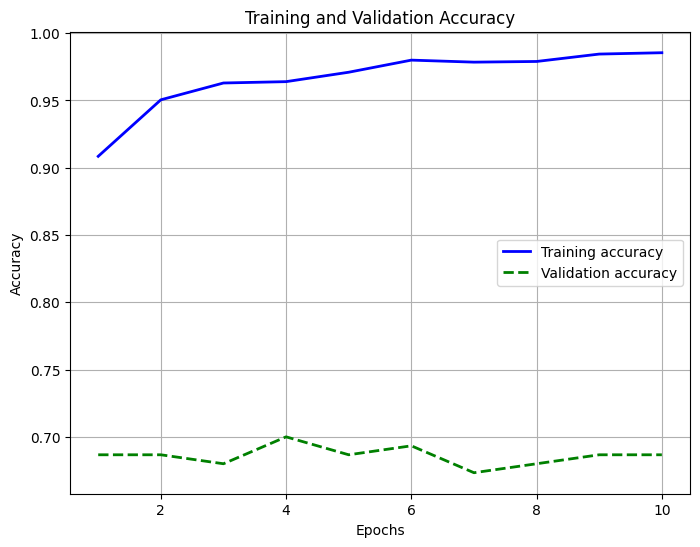

In [79]:
# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(epochs, InceptionResNetV2_bo_acc, color='blue', linestyle='-', label='Training accuracy', linewidth=2)
plt.plot(epochs, InceptionResNetV2_bo_val_acc, color='green', linestyle='--', label='Validation accuracy', linewidth=2)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

*   Let's plot the training and validation loss of the model

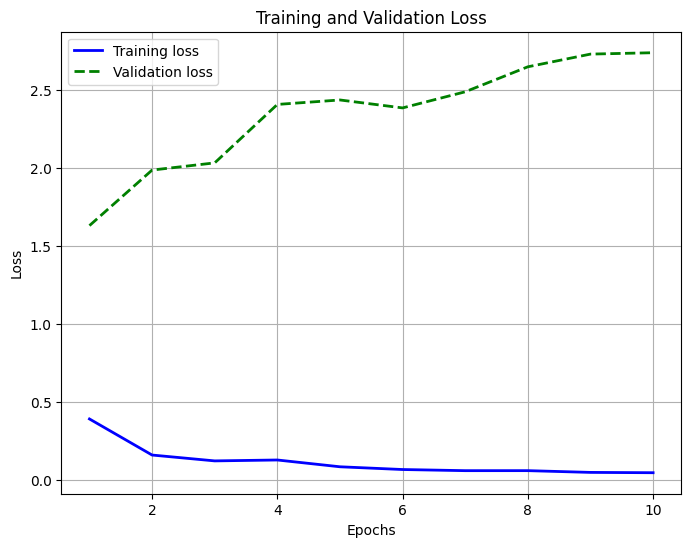

In [80]:
# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(epochs, InceptionResNetV2_bo_loss, color='blue', linestyle='-', label='Training loss', linewidth=2)
plt.plot(epochs, InceptionResNetV2_bo_val_loss, color='green', linestyle='--', label='Validation loss', linewidth=2)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

*   Classification report and prediction on the benign vs. others class.


In [81]:
# Import the seaborn library for the confusion metrics heatmap
import seaborn as sns
# Import the sklearn library to evaluate the models through different metrices
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, balanced_accuracy_score

*   Predictions on the trained model

In [82]:
# Let's obtain the predictions on the trained model
y_pred_bo = model.predict(X_test_bo)
# Convert predicted probabilities to binary values
y_pred_binary_bo = np.where(y_pred_bo >= 0.5, 1, 0)

19/19 [==============================] - 33s 2s/step


*   Confusion Matrix Calculation

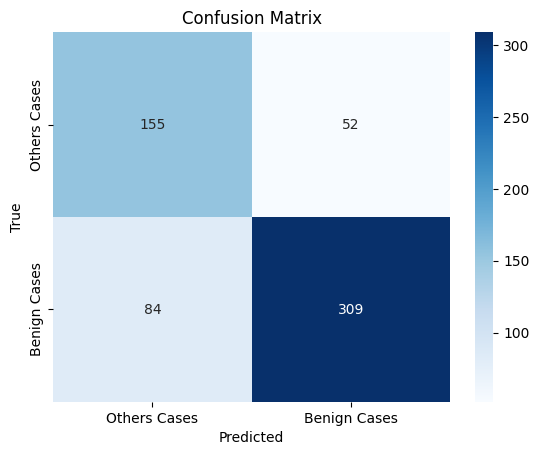

In [83]:
# Calculate confusion matrix
confusionmatrix_bo = confusion_matrix(Y_test_bo, y_pred_binary_bo)

# List of class labels
class_labels_bo = ['Others Cases', 'Benign Cases']

# Plot the confusion matrix
sns.heatmap(confusionmatrix_bo, annot = True, fmt = "d", cmap = "Blues", xticklabels = class_labels_bo, yticklabels = class_labels_bo)

# Added the labels, title, and ticks
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.xticks(ticks=[0.5, 1.5], labels = class_labels_bo)
plt.yticks(ticks=[0.5, 1.5], labels = class_labels_bo)

# Display the plot
plt.show()

*   Here we have the obtained performance scores of the classification model

In [84]:
# Calculate test accuracy, sensitivity, specificity, precision, recall, F1 score, and AUC score
tn_bo, fp_bo, fn_bo, tp_bo = confusionmatrix_bo.ravel()
test_accuracy_bo = accuracy_score(Y_test_bo, y_pred_binary_bo)
sensitivity_bo = tp_bo / (tp_bo + fn_bo)
specificity_bo = tn_bo / (tn_bo + fp_bo)
precision_bo = tp_bo / (tp_bo + fp_bo)
recall_bo = sensitivity_bo
f1_score_bo = 2 * (precision_bo * recall_bo) / (precision_bo + recall_bo)
auc_score_bo = roc_auc_score(Y_test_bo, y_pred_bo)

# Display the performance scores
print("Test accuracy of benign vs. others class model:", test_accuracy_bo)
print("Sensitivity of benign vs. others class model:", sensitivity_bo)
print("Specificity of benign vs. others clas model:", specificity_bo)
print("Precision of benign vs. others class model:", precision_bo)
print("Recall of benign vs. others class model:", recall_bo)
print("F1 Score of benign vs. others class model:", f1_score_bo)
print("AUC Score of benign vs. others class model:", auc_score_bo)

Test accuracy of benign vs. others class model: 0.7733333333333333
Sensitivity of benign vs. others class model: 0.7862595419847328
Specificity of benign vs. others clas model: 0.748792270531401
Precision of benign vs. others class model: 0.8559556786703602
Recall of benign vs. others class model: 0.7862595419847328
F1 Score of benign vs. others class model: 0.8196286472148541
AUC Score of benign vs. others class model: 0.8093754225516588


*   Plotting and Calculating the ROC curve

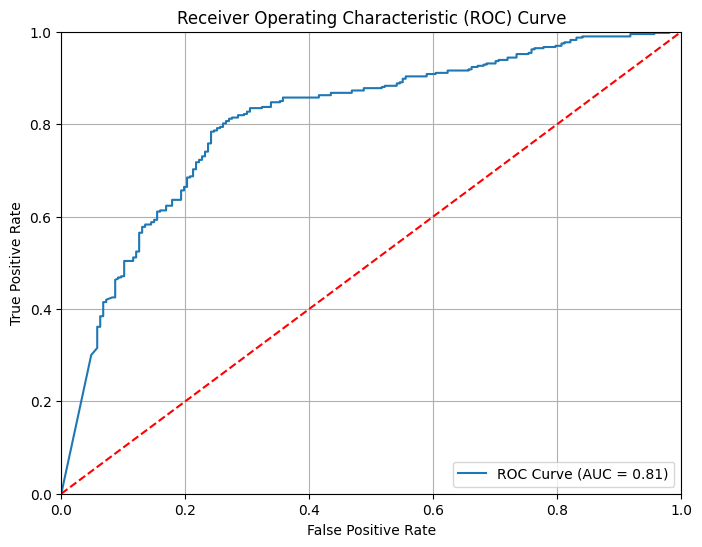

In [85]:
# Calculate ROC curve
fpr_bo, tpr_bo, thresholds = roc_curve(Y_test_bo, y_pred_bo)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_bo, tpr_bo, label='ROC Curve (AUC = {:.2f})'.format(auc_score_bo))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

*4.2.* **Model Training for the  melanoma vs seborrheic keratosis**

In [86]:
# Training the model using the fit function in Keras
InceptionResNetV2_ms = model.fit(X_train_ms, Y_train_ms, epochs= 10, batch_size = 16, validation_data=(X_validation_ms, Y_validation_ms), verbose=2)

Epoch 1/10
40/40 - 45s - loss: 0.5452 - acc: 0.9268 - val_loss: 3.2609 - val_acc: 0.6944 - 45s/epoch - 1s/step
Epoch 2/10
40/40 - 37s - loss: 0.0592 - acc: 0.9841 - val_loss: 2.5283 - val_acc: 0.7222 - 37s/epoch - 929ms/step
Epoch 3/10
40/40 - 38s - loss: 0.0238 - acc: 0.9920 - val_loss: 2.5581 - val_acc: 0.7222 - 38s/epoch - 943ms/step
Epoch 4/10
40/40 - 38s - loss: 0.0145 - acc: 0.9920 - val_loss: 2.5900 - val_acc: 0.7083 - 38s/epoch - 957ms/step
Epoch 5/10
40/40 - 38s - loss: 0.0107 - acc: 0.9968 - val_loss: 2.6093 - val_acc: 0.7083 - 38s/epoch - 957ms/step
Epoch 6/10
40/40 - 38s - loss: 0.0090 - acc: 0.9968 - val_loss: 2.6325 - val_acc: 0.7083 - 38s/epoch - 950ms/step
Epoch 7/10
40/40 - 40s - loss: 0.0077 - acc: 0.9968 - val_loss: 2.6485 - val_acc: 0.6944 - 40s/epoch - 1s/step
Epoch 8/10
40/40 - 38s - loss: 0.0069 - acc: 1.0000 - val_loss: 2.6714 - val_acc: 0.7083 - 38s/epoch - 941ms/step
Epoch 9/10
40/40 - 36s - loss: 0.0061 - acc: 1.0000 - val_loss: 2.6915 - val_acc: 0.7083 - 36s

In [87]:
# Models performance metrices
InceptionResNetV2_ms_loss = InceptionResNetV2_ms.history['loss']
InceptionResNetV2_ms_val_loss = InceptionResNetV2_ms.history['val_loss']
InceptionResNetV2_ms_acc = InceptionResNetV2_ms.history['acc']
InceptionResNetV2_ms_val_acc = InceptionResNetV2_ms.history['val_acc']
epochs = range(1, len(InceptionResNetV2_ms_loss) + 1)

*   Let's plot the training and validation accuracy of the model

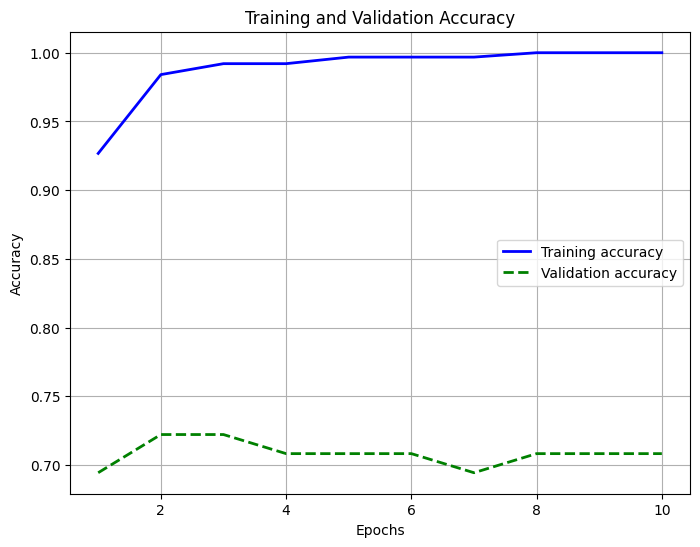

In [88]:
# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(epochs, InceptionResNetV2_ms_acc, color='blue', linestyle='-', label='Training accuracy', linewidth=2)
plt.plot(epochs, InceptionResNetV2_ms_val_acc, color='green', linestyle='--', label='Validation accuracy', linewidth=2)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

*   Let's plot the training and validation loss of the model

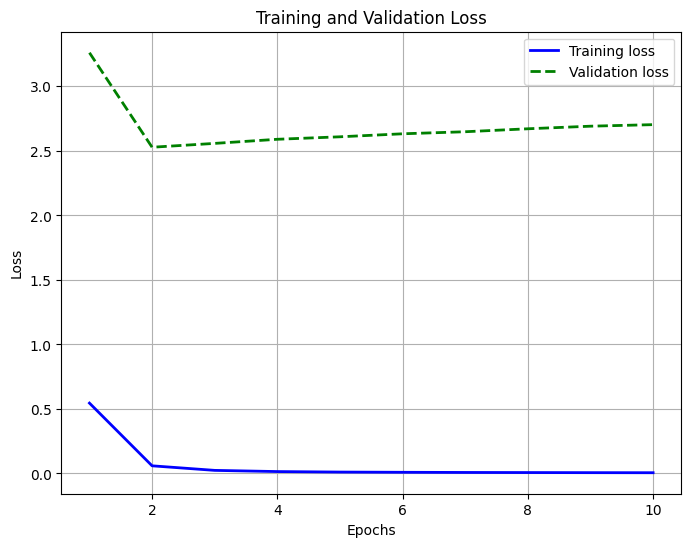

In [89]:
# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(epochs, InceptionResNetV2_ms_loss, color='blue', linestyle='-', label='Training loss', linewidth=2)
plt.plot(epochs, InceptionResNetV2_ms_val_loss, color='green', linestyle='--', label='Validation loss', linewidth=2)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

*   Predictions on the trained model.

In [90]:
# Let's obtain the predictions on the trained model
y_pred_ms = model.predict(X_test_ms)
# Convert predicted probabilities to binary values
y_pred_binary_ms= np.where(y_pred_ms >= 0.5, 1, 0)

7/7 [==============================] - 11s 2s/step


*   Confusion Matrix Calculation

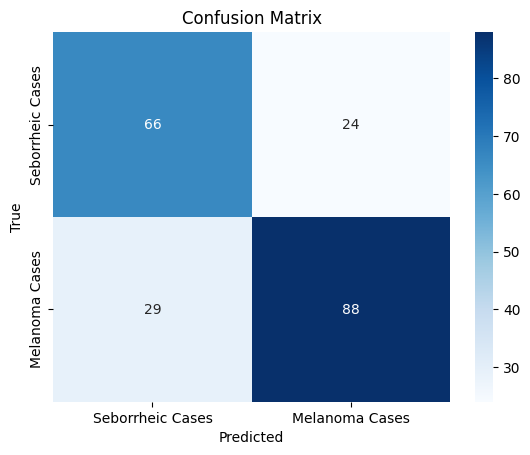

In [91]:
# Calculate confusion matrix
confusionmatrix_ms = confusion_matrix(Y_test_ms, y_pred_binary_ms)

# List of class labels
class_labels_ms = ['Seborrheic Cases', 'Melanoma Cases']

# Plot the confusion matrix
sns.heatmap(confusionmatrix_ms, annot = True, fmt = "d", cmap = "Blues", xticklabels = class_labels_ms, yticklabels = class_labels_ms)

# Added the labels, title, and ticks
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.xticks(ticks=[0.5, 1.5], labels = class_labels_ms)
plt.yticks(ticks=[0.5, 1.5], labels = class_labels_ms)

# Display the plot
plt.show()

*   Here we have the obtained performance scores of the classification model

In [92]:
# Calculate test accuracy, sensitivity, specificity, precision, recall, F1 score, and AUC score
tn_ms, fp_ms, fn_ms, tp_ms = confusionmatrix_ms.ravel()
test_accuracy_ms = accuracy_score(Y_test_ms, y_pred_binary_ms)
sensitivity_ms = tp_ms / (tp_ms + fn_ms)
specificity_ms = tn_ms / (tn_ms + fp_ms)
precision_ms = tp_ms / (tp_ms + fp_ms)
recall_ms = sensitivity_ms
f1_score_ms = 2 * (precision_ms * recall_ms) / (precision_ms + recall_ms)
auc_score_ms = roc_auc_score(Y_test_ms, y_pred_ms)

# Display the performance scores
print("Test accuracy of melanoma vs seborrheic keratosis class model:", test_accuracy_ms)
print("Sensitivity of melanoma vs seborrheic keratosis class model:", sensitivity_ms)
print("Specificity of melanoma vs seborrheic keratosis class model:", specificity_ms)
print("Precision of melanoma vs seborrheic keratosis class model:", precision_ms)
print("Recall omelanoma vs seborrheic keratosis class model:", recall_ms)
print("F1 Score of melanoma vs seborrheic keratosis class model:", f1_score_ms)
print("AUC Score of melanoma vs seborrheic keratosis class model:", auc_score_ms)

Test accuracy of melanoma vs seborrheic keratosis class model: 0.7439613526570048
Sensitivity of melanoma vs seborrheic keratosis class model: 0.7521367521367521
Specificity of melanoma vs seborrheic keratosis class model: 0.7333333333333333
Precision of melanoma vs seborrheic keratosis class model: 0.7857142857142857
Recall omelanoma vs seborrheic keratosis class model: 0.7521367521367521
F1 Score of melanoma vs seborrheic keratosis class model: 0.7685589519650656
AUC Score of melanoma vs seborrheic keratosis class model: 0.802326685660019


*   Plotting and Calculating the ROC curve

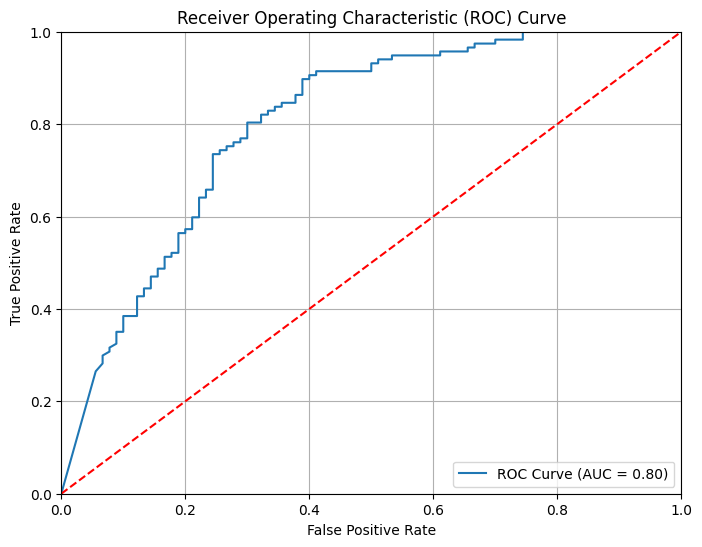

In [93]:
# Calculate ROC curve
fpr_ms, tpr_ms, thresholds = roc_curve(Y_test_ms, y_pred_ms)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_ms, tpr_ms, label='ROC Curve (AUC = {:.2f})'.format(auc_score_ms))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

*4.3.* **Balance Malticlass Accuracy (BMA)**

*   Now, we are going to calculate the Balance Malticlass Accuracy (BMA) among 
three classes such as benign, melanoma, seborrheic keratosis. 

In [94]:
# Compute the Balance Malticlass Accuracy (BMA) among three classes 
bme = (1.0/3.0) * ((tp_bo/(tp_bo + fn_bo)) + (tp_ms/(tp_ms + fn_ms)) +  (tn_ms/(tn_ms + fp_ms)) )
print(f'Balance Maulticlass Accuracy (BMA):', bme)

Balance Maulticlass Accuracy (BMA): 0.7572432091516061


End.........................................